<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09



<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1w5HIG2LsuVnhhuEYfRvpBn4hHziWj_wW" width = "300" align="center"/>

El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_09/data/BC.csv", sep=",")
df = df.set_index('id')
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0}) # target
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.

In [3]:
print('Tamaño del dataset:', df.shape)
display(df.dtypes)

Tamaño del dataset: (569, 31)


diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [4]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [5]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

El dataset consiste información de 569 casos con 30 atributos continuos distintos. Además, no hay datos nulos.

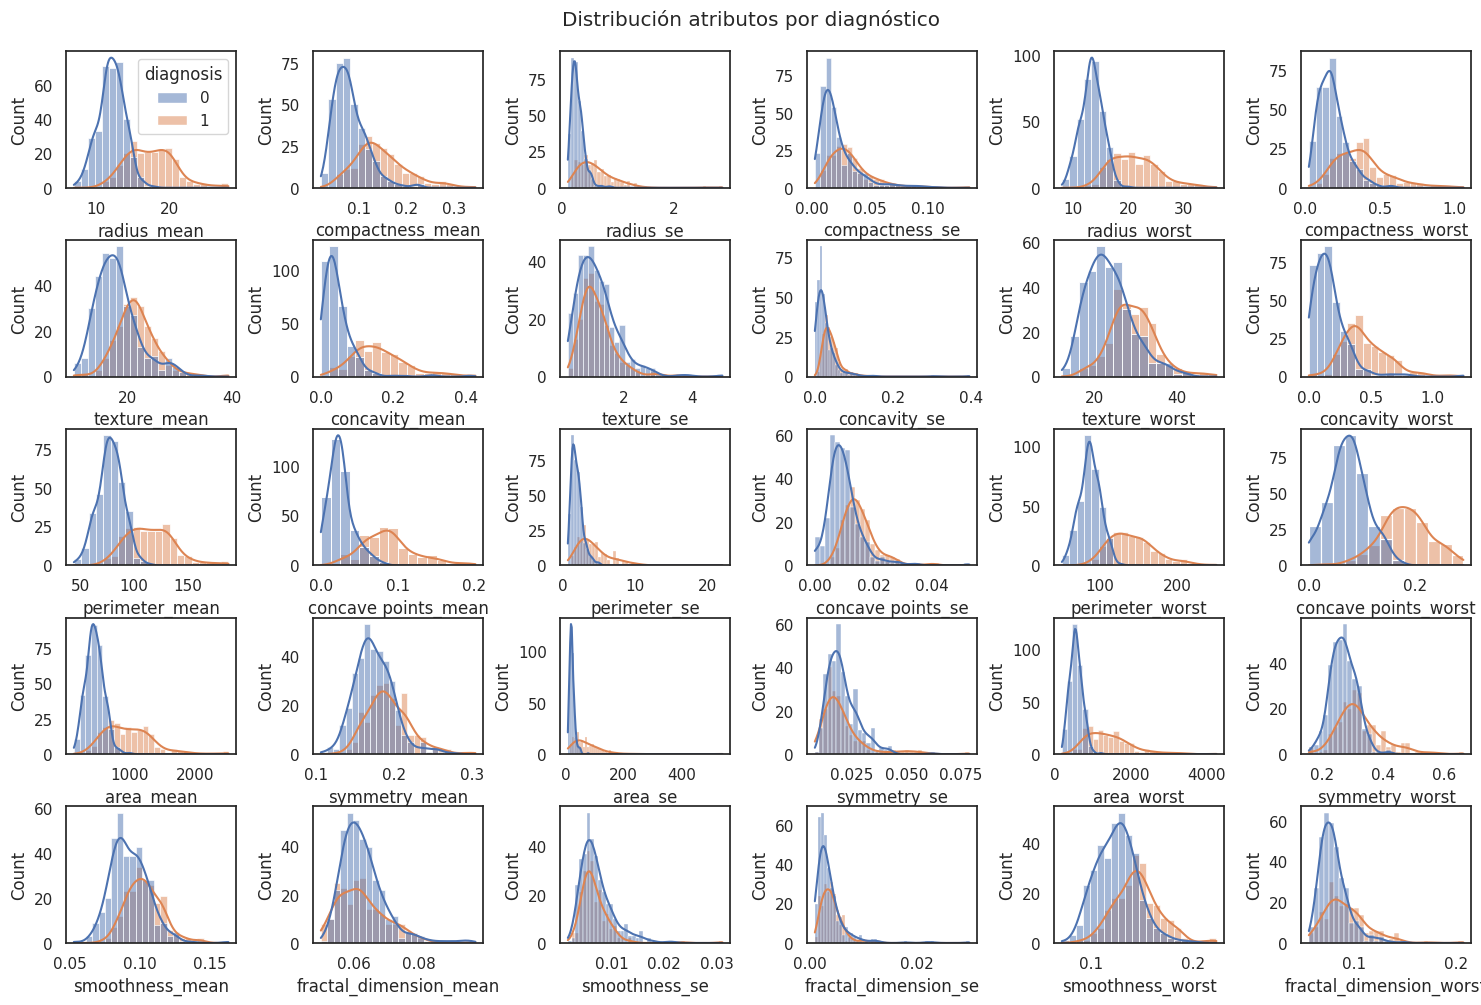

In [6]:
att = [col for col in df.columns if col not in ['diagnosis']]

fig, axes = plt.subplots(figsize=(15,10), ncols=6, nrows=5)
fig.suptitle('Distribución atributos por diagnóstico')
fig.tight_layout()
for i, col in enumerate(att):
    if i == 0:
        sns.histplot(data=df, x=col, kde=True, hue='diagnosis', ax=axes[i%5,i//5])
    else:
        sns.histplot(data=df, x=col, kde=True, hue='diagnosis', ax=axes[i%5,i//5], legend=False)


2. Normalizar las variables numéricas con el método **StandardScaler**.

In [7]:
X = df[att]
y = df['diagnosis']

scaler = StandardScaler()
scaler.set_output(transform='pandas')

scaler.fit(X)
X_scaled = scaler.transform(X)

In [8]:
X_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
926682,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
926954,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409


3. Realizar un método de reducción de dimensionalidad visto en clases.

Text(0, 0.5, 'Acummulated Explained Variance')

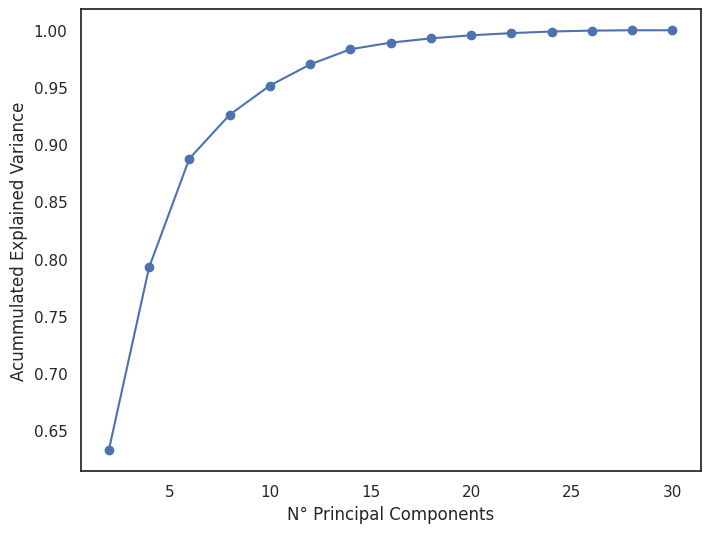

In [9]:
n_expl_var = []
for n in range(2,31,2):
    pca = PCA(n_components=n)
    pca.set_output(transform='pandas')
    pca.fit(X_scaled)
    n_expl_var.append(pca.explained_variance_ratio_.sum())


fig, axes = plt.subplots(figsize=(8,6))
axes.plot(range(2,31,2), n_expl_var, marker='o')
axes.set_xlabel('N° Principal Components')
axes.set_ylabel('Acummulated Explained Variance')

Con esto conlcuimos que 16 es una cantidad apropiada de componentes principales.

In [10]:
pca = PCA(n_components=16)
pca.set_output(transform='pandas')

pca.fit(X_scaled)
X_proc = pca.transform(X_scaled)

4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X_proc, y, test_size=0.33, random_state=42)

In [12]:
# LogisticRegression

log = LogisticRegression(solver='liblinear')
C = np.logspace(-3,3,10)
parameter={'C': C}
search_log = GridSearchCV(log, parameter, scoring='f1')

search_log.fit(X_train, y_train)

sorted(search_log.cv_results_.keys())
print('Parámetros C utilizados, y su ranking: ')
display(search_log.cv_results_['params'], search_log.cv_results_['rank_test_score'])


idx = search_log.cv_results_['rank_test_score'].tolist().index(1)

print('\f1_score del clasificador con el mejor parámetro C encontrado: ', C[idx])
log=LogisticRegression(C=C[idx]).fit(X_train,y_train)
print('Conjunto de pruebas: ', f1_score(y_train,log.predict(X_train)))
print('Conjunto de test:    ', f1_score(y_test, log.predict(X_test)))

print('Rendimiento en test set:\n')
print('Accuracy     :', accuracy_score(y_test, log.predict(X_test)))
print('Precision    :', precision_score(y_test, log.predict(X_test)))
print('Recall       :', recall_score(y_test, log.predict(X_test)))
print('F1 Score     :', f1_score(y_test, log.predict(X_test)))


Parámetros C utilizados, y su ranking: 


[{'C': 0.001},
 {'C': 0.004641588833612777},
 {'C': 0.021544346900318832},
 {'C': 0.1},
 {'C': 0.46415888336127775},
 {'C': 2.154434690031882},
 {'C': 10.0},
 {'C': 46.41588833612773},
 {'C': 215.44346900318823},
 {'C': 1000.0}]

array([10,  6,  5,  1,  2,  3,  4,  7,  7,  9], dtype=int32)

1_score del clasificador con el mejor parámetro C encontrado:  0.1
Conjunto de pruebas:  0.9718309859154929
Conjunto de test:     0.9850746268656716
Rendimiento en test set:

Accuracy     : 0.9893617021276596
Precision    : 0.9850746268656716
Recall       : 0.9850746268656716
F1 Score     : 0.9850746268656716


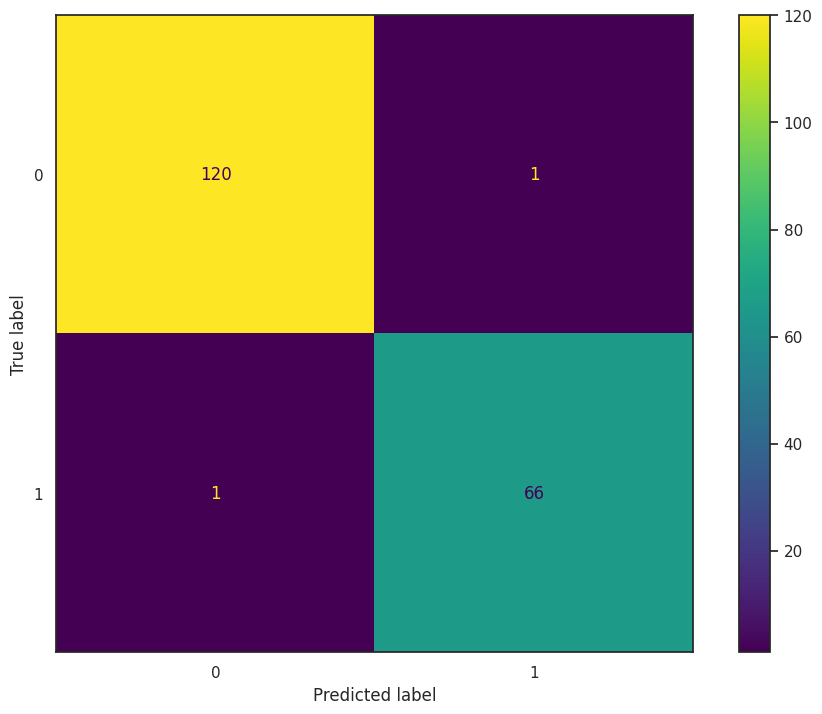

In [13]:
cm = confusion_matrix(y_test, log.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
disp.plot()
plt.show()

In [14]:
# SVC

svc = SVC()
C = np.logspace(-3,3,10)
parameter={'C': C}
search_svc = GridSearchCV(svc, parameter, scoring='f1')

search_svc.fit(X_train, y_train)

sorted(search_svc.cv_results_.keys())
print('Parámetros C utilizados, y su ranking: ')
display(search_svc.cv_results_['params'], search_svc.cv_results_['rank_test_score'])


idx = search_svc.cv_results_['rank_test_score'].tolist().index(1)

print('\f1_score del clasificador con el mejor parámetro C encontrado: ', C[idx])
svc=SVC(C=C[idx]).fit(X_train,y_train)
print('Conjunto de pruebas: ', f1_score(y_train,svc.predict(X_train)))
print('Conjunto de test:    ', f1_score(y_test, svc.predict(X_test)))

print('Rendimiento en test set:\n')
print('Accuracy     :', accuracy_score(y_test, svc.predict(X_test)))
print('Precision    :', precision_score(y_test, svc.predict(X_test)))
print('Recall       :', recall_score(y_test, svc.predict(X_test)))
print('F1 Score     :', f1_score(y_test, svc.predict(X_test)))

Parámetros C utilizados, y su ranking: 


[{'C': 0.001},
 {'C': 0.004641588833612777},
 {'C': 0.021544346900318832},
 {'C': 0.1},
 {'C': 0.46415888336127775},
 {'C': 2.154434690031882},
 {'C': 10.0},
 {'C': 46.41588833612773},
 {'C': 215.44346900318823},
 {'C': 1000.0}]

array([9, 9, 8, 7, 6, 1, 2, 3, 4, 4], dtype=int32)

1_score del clasificador con el mejor parámetro C encontrado:  2.154434690031882
Conjunto de pruebas:  0.9824561403508771
Conjunto de test:     0.9701492537313433
Rendimiento en test set:

Accuracy     : 0.9787234042553191
Precision    : 0.9701492537313433
Recall       : 0.9701492537313433
F1 Score     : 0.9701492537313433


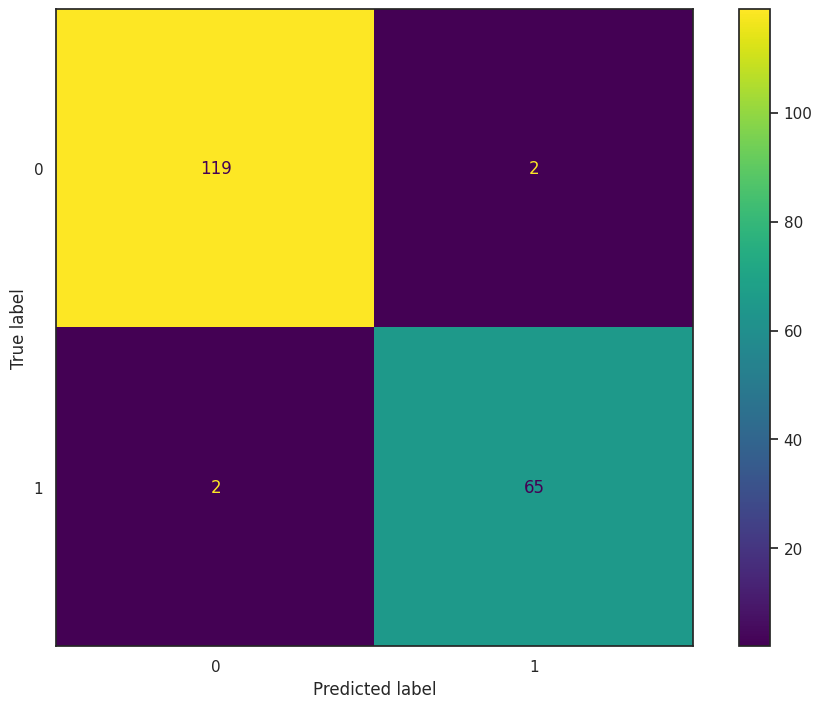

In [15]:
cm = confusion_matrix(y_test, svc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
disp.plot()
plt.show()

In [16]:
rfc = RandomForestClassifier()
n_est = (5, 10, 25, 50, 75, 100, 200, 500, 700, 1000)
parameter={'n_estimators': n_est}
search_rfc = GridSearchCV(rfc, parameter, scoring='f1')

search_rfc.fit(X_train, y_train)

sorted(search_rfc.cv_results_.keys())
print('Parámetros n_estimators utilizados, y su ranking: ')
display(search_rfc.cv_results_['params'], search_rfc.cv_results_['rank_test_score'])


idx = search_rfc.cv_results_['rank_test_score'].tolist().index(1)

print('\nf1_score del clasificador con el mejor parámetro n_estimators encontrado: ', n_est[idx])
rfc=RandomForestClassifier(n_estimators=n_est[idx]).fit(X_train,y_train)
print('Conjunto de pruebas: ', f1_score(y_train,rfc.predict(X_train)))
print('Conjunto de test:    ', f1_score(y_test, rfc.predict(X_test)))

print('Rendimiento en test set:\n')
print('Accuracy     :', accuracy_score(y_test, rfc.predict(X_test)))
print('Precision    :', precision_score(y_test, rfc.predict(X_test)))
print('Recall       :', recall_score(y_test, rfc.predict(X_test)))
print('F1 Score     :', f1_score(y_test, rfc.predict(X_test)))

Parámetros n_estimators utilizados, y su ranking: 


[{'n_estimators': 5},
 {'n_estimators': 10},
 {'n_estimators': 25},
 {'n_estimators': 50},
 {'n_estimators': 75},
 {'n_estimators': 100},
 {'n_estimators': 200},
 {'n_estimators': 500},
 {'n_estimators': 700},
 {'n_estimators': 1000}]

array([ 9, 10,  1,  8,  7,  6,  2,  5,  2,  2], dtype=int32)


f1_score del clasificador con el mejor parámetro n_estimators encontrado:  25
Conjunto de pruebas:  1.0
Conjunto de test:     0.9064748201438849
Rendimiento en test set:

Accuracy     : 0.9308510638297872
Precision    : 0.875
Recall       : 0.9402985074626866
F1 Score     : 0.9064748201438849


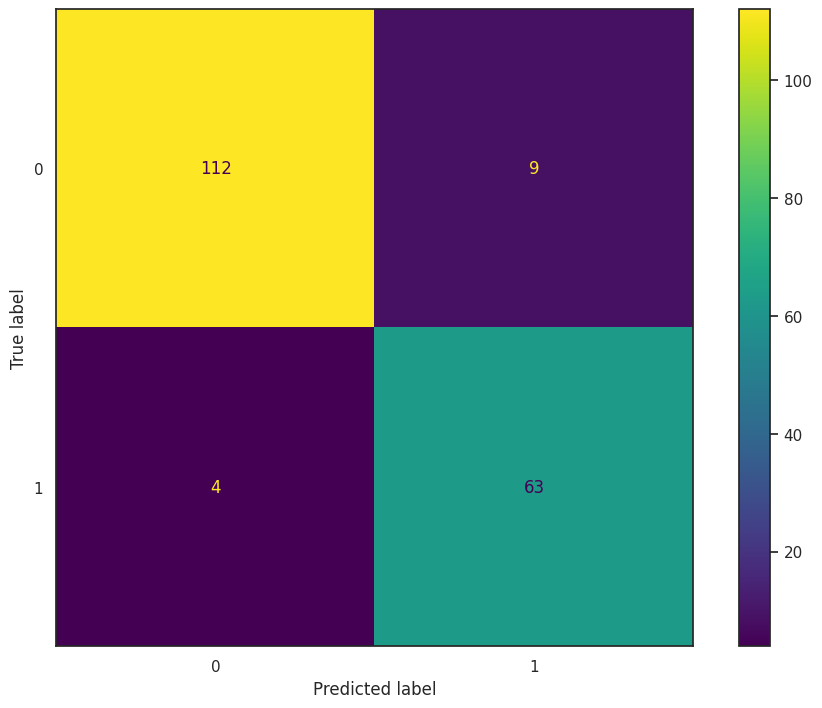

In [17]:
cm = confusion_matrix(y_test, rfc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
disp.plot()
plt.show()

LogisticRegression fue el modelo que menos se equivocó, teniendo mejor f1_score que el resto de los modelos. Además, se ve que no sufrió de overfitting pues tuvo un buen rendimiento en el conjunto de pruebas, a diferencia del RandomForest, que a pesar de clasificar perfectamente el conjunto de pruebas, no generalizó bien.